In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import math
from collections import Counter
import joblib

In [7]:
def split_by_last_comma(text):
    return text.rsplit(",", 1)

In [11]:
passwords = []
strengths = []
file_path = r"D:\Model\ChatBot\archive\data.csv"
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:

    for line in f:
        line = line.strip()

        if not line:
            continue

        if line.lower() == "password,strength":
            continue

        try:
            pwd, strength = line.rsplit(",", 1)
            strength = int(strength)

        except ValueError:
            split_error += 1
            continue

        passwords.append(pwd)
        strengths.append(strength)

df = pd.DataFrame({
    "password": passwords,
    "strength": strengths
})

df



,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669874,10redtux10,1
669875,infrared1,1
669876,184520socram,1
669877,marken22a,1


In [36]:
df.count()

password    669879
strength    669879
dtype: int64

In [46]:
df["strength"].value_counts()

strength
1    496801
0     89702
2     83376
Name: count, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669879 entries, 0 to 669878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669879 non-null  object
 1   strength  669879 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [38]:
df[df["password"].isna()]

,password,strength


In [47]:
df["strength"] = df["strength"].astype(int)

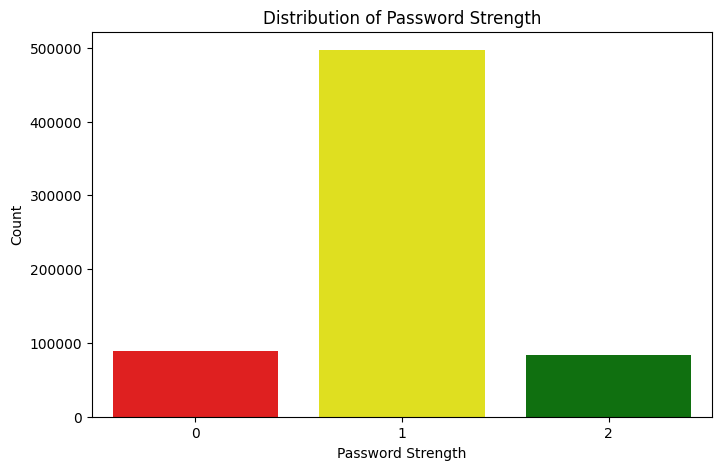

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(
    x="strength",
    data=df,
    hue="strength",
    palette={0: "red", 1: "yellow", 2: "green"},
    legend=False
)
plt.title("Distribution of Password Strength")
plt.xlabel("Password Strength")
plt.ylabel("Count")
plt.show()


In [12]:
def len_password(password:str):
    try:
        return len(password)
    except:
        return 0

def count_uppercase(password:str):
    try:
        return sum(1 for i in password if i.isupper())
    except:
        return 0
def count_lowercase(password:str):
    try:
        return sum(1 for i in password if i.islower())
    except:
        return 0
    
def count_digits(password:str):
    try:
        return sum(1 for i in password if i.isdigit())
    except:
        return 0
    
def count_special_chars(password: str) -> int:
    if not password:
        return 0
    return sum(1 for c in password if not c.isalnum())

def entropy_theoretical(password: str) -> float:
    if not password:
        return 0.0

    alphabet_size = 0

    if any(c.islower() for c in password):
        alphabet_size += 26   
    if any(c.isupper() for c in password):
        alphabet_size += 26  
    if any(c.isdigit() for c in password):
        alphabet_size += 10  
    if any(not c.isalnum() for c in password):
        alphabet_size += 32   

    return round(len(password) * math.log2(alphabet_size), 2) if alphabet_size > 0 else 0.0



def entropy_shannon(password: str) -> float:
    if not password:
        return 0.0

    length = len(password)
    counts = Counter(password)

    entropy = -sum(
        (count / length) * math.log2(count / length)
        for count in counts.values()
    )

    return round(entropy, 2)


In [67]:
df['password'] = df['password'].astype(str)
df["len_password"] = df["password"].apply(len_password)
df["count_uppercase"] = df["password"].apply(count_uppercase)
df["count_lowercase"] = df["password"].apply(count_lowercase)
df["count_digits"] = df["password"].apply(count_digits)
df["count_special_chars"] = df["password"].apply(count_special_chars)
df["entropy_theoretical"] = df["password"].apply(entropy_theoretical)
df["entropy_shannon"] = df["password"].apply(entropy_shannon)

In [68]:
df

,password,strength,len_password,count_uppercase,count_lowercase,count_digits,entropy_theoretical,entropy_shannon,count_special_chars
0,kzde5577,1,8,0,4,4,41.36,2.50,0
1,kino3434,1,8,0,4,4,41.36,2.50,0
2,visi7k1yr,1,9,0,7,2,46.53,2.95,0
3,megzy123,1,8,0,5,3,41.36,3.00,0
4,lamborghin1,1,11,0,10,1,56.87,3.46,0
...,...,...,...,...,...,...,...,...,...
669874,10redtux10,1,10,0,6,4,51.70,2.92,0
669875,infrared1,1,9,0,8,1,46.53,2.95,0
669876,184520socram,1,12,0,6,6,62.04,3.58,0
669877,marken22a,1,9,0,7,2,46.53,2.73,0


In [63]:
numeric_cols = [
    "len_password",
    "entropy_theoretical",
    "entropy_shannon",
    "count_uppercase",
    "count_lowercase",
    "count_digits",
    "count_special_chars",
    "count_lowercase",
    "strength"
]

corr_matrix = df[numeric_cols].corr(method="pearson")
corr_matrix



,len_password,entropy_theoretical,entropy_shannon,count_uppercase,count_lowercase,count_digits,count_special_chars,count_lowercase,strength
len_password,1.000000,0.990129,0.740849,0.641004,0.398788,0.192781,0.313055,0.398788,0.813738
entropy_theoretical,0.990129,1.000000,0.727743,0.687383,0.368523,0.154704,0.352844,0.368523,0.815322
entropy_shannon,0.740849,0.727743,1.000000,0.537713,0.382404,-0.008362,0.101355,0.382404,0.703170
count_uppercase,0.641004,0.687383,0.537713,1.000000,-0.100712,-0.080808,0.006408,-0.100712,0.620011
count_lowercase,0.398788,0.368523,0.382404,-0.100712,1.000000,-0.534253,0.160347,1.000000,0.228882
count_digits,0.192781,0.154704,-0.008362,-0.080808,-0.534253,1.000000,0.069910,-0.534253,0.178414
count_special_chars,0.313055,0.352844,0.101355,0.006408,0.160347,0.069910,1.000000,0.160347,0.155891
count_lowercase,0.398788,0.368523,0.382404,-0.100712,1.000000,-0.534253,0.160347,1.000000,0.228882
strength,0.813738,0.815322,0.703170,0.620011,0.228882,0.178414,0.155891,0.228882,1.000000


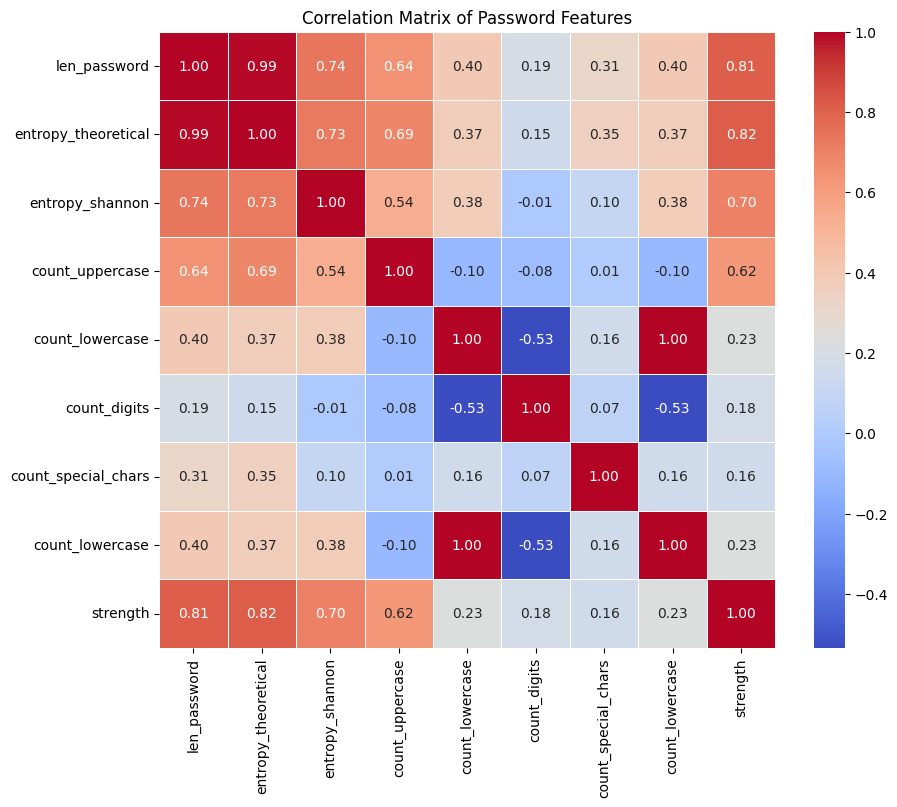

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,        
    fmt=".2f",        
    cmap="coolwarm",
    square=True,
    linewidths=0.5
)

plt.title("Correlation Matrix of Password Features")
plt.show()


In [13]:
def split_dataset(df, target_col='strength', train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    train_val_df, test_df = train_test_split(
        df,
        test_size=test_size,
        stratify=df[target_col],
        random_state=random_state
    )

    val_ratio = val_size / (train_size + val_size)
    train_df, val_df = train_test_split(
        train_val_df,
        test_size=val_ratio,
        stratify=train_val_df[target_col],
        random_state=random_state
    )
    
    print(f"Dataset split complete (80-10-10):")
    print(f"  Train:      {len(train_df):>7} samples ({len(train_df)/len(df)*100:.1f}%)")
    print(f"  Validation: {len(val_df):>7} samples ({len(val_df)/len(df)*100:.1f}%)")
    print(f"  Test:       {len(test_df):>7} samples ({len(test_df)/len(df)*100:.1f}%)")
    print(f"  Total:      {len(df):>7} samples")
    
    return train_df, val_df, test_df

In [70]:
train_df, val_df, test_df = split_dataset(df, target_col='strength')
X_train = train_df.drop(columns=["strength"])
print(X_train)

Dataset split complete (80-10-10):
  Train:       535903 samples (80.0%)
  Validation:   66988 samples (10.0%)
  Test:         66988 samples (10.0%)
  Total:       669879 samples
            password  len_password  count_uppercase  count_lowercase  \
323946     qbveaih98             9                0                7   
528129       loaded1             7                0                6   
341549     ucanpaqd1             9                0                8   
533054      x1234567             8                0                1   
51055       mert5978             8                0                4   
...              ...           ...              ...              ...   
107736  ghostrider85            12                0               10   
162933     powerdvd5             9                0                8   
137652     mascapa45             9                0                7   
165816      ezime978             8                0                5   
606782     996641XXZ         

In [75]:
import joblib

In [14]:
def train_and_save_models(df, password_col='password', target_col='strength', output_dir='models_machine_learning'):
    df[password_col] = df[password_col].astype(str)

    # --- Tạo feature numeric ---
    df_features = pd.DataFrame()
    df_features["len_password"] = df[password_col].apply(len_password)
    df_features["count_uppercase"] = df[password_col].apply(count_uppercase)
    df_features["count_lowercase"] = df[password_col].apply(count_lowercase)
    df_features["count_digits"] = df[password_col].apply(count_digits)
    df_features["count_special_chars"] = df[password_col].apply(count_special_chars)
    df_features["entropy_theoretical"] = df[password_col].apply(entropy_theoretical)
    df_features["entropy_shannon"] = df[password_col].apply(entropy_shannon)

    # Thêm target
    df_features[target_col] = df[target_col]

    # --- Split dataset ---
    train_df, val_df, test_df = split_dataset(df_features, target_col=target_col)

    X_train = train_df.drop(columns=[target_col])
    y_train = train_df[target_col]
    X_val   = val_df.drop(columns=[target_col])
    y_val   = val_df[target_col]
    X_test  = test_df.drop(columns=[target_col])
    y_test  = test_df[target_col]

    # --- Scale numeric features ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled   = scaler.transform(X_val)
    X_test_scaled  = scaler.transform(X_test)

    # --- Lưu scaler ---
    os.makedirs(output_dir, exist_ok=True)
    scaler_path = os.path.join(output_dir, "scaler.pkl")
    joblib.dump(scaler, scaler_path)
    print("✓ Scaler fitted & saved at", scaler_path)

    models = {}

    # --- Hàm train & lưu model ---
    def train_model(model, name, X_tr, y_tr, X_val_eval, y_val, scaled=True):
        model.fit(X_tr, y_tr)
        models[name] = model

        # Lưu model bằng joblib
        model_path = os.path.join(output_dir, f"{name}.pkl")
        joblib.dump(model, model_path)
        print(f"✓ Model {name} saved at {model_path}")

        # --- Chọn dữ liệu eval ---
        X_tr_eval = X_tr
        X_val_eval_final = X_val_eval if scaled else X_val_eval

        # --- Train metrics ---
        y_tr_pred = model.predict(X_tr_eval)
        acc_tr = accuracy_score(y_tr, y_tr_pred)
        prec_tr = precision_score(y_tr, y_tr_pred, average='weighted', zero_division=0)
        f1_tr = f1_score(y_tr, y_tr_pred, average='weighted', zero_division=0)
        cm_tr = confusion_matrix(y_tr, y_tr_pred)

        # --- Validation metrics ---
        y_val_pred = model.predict(X_val_eval_final)
        acc_val = accuracy_score(y_val, y_val_pred)
        prec_val = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
        f1_val = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)
        cm_val = confusion_matrix(y_val, y_val_pred)

        # --- In kết quả ---
        print(f"\n{name.upper()}")
        print(f"Train Accuracy: {acc_tr:.4f}, Precision: {prec_tr:.4f}, F1: {f1_tr:.4f}")
        print("Confusion Matrix (Train):")
        print(pd.DataFrame(cm_tr, index=[f"True_{i}" for i in range(len(cm_tr))],
                                   columns=[f"Pred_{i}" for i in range(len(cm_tr))]))

        print(f"\nValidation Accuracy: {acc_val:.4f}, Precision: {prec_val:.4f}, F1: {f1_val:.4f}")
        print("Confusion Matrix (Validation):")
        print(pd.DataFrame(cm_val, index=[f"True_{i}" for i in range(len(cm_val))],
                                   columns=[f"Pred_{i}" for i in range(len(cm_val))]))

    # --- Train các model ---
    train_model(RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
                "random_forest", X_train, y_train, X_val_scaled, y_val, scaled=False)

    train_model(SVC(class_weight='balanced', probability=True, random_state=42),
                "svm", X_train_scaled, y_train, X_val_scaled, y_val, scaled=True)

    train_model(KNeighborsClassifier(n_neighbors=5),
                "knn", X_train_scaled, y_train, X_val_scaled, y_val, scaled=True)

    print("\nTraining completed. Models saved in folder:", output_dir)
    return models, (X_train, y_train, X_val, y_val, X_test, y_test)

In [15]:
models, (X_train, y_train, X_val, y_val, X_test, y_test) = train_and_save_models(
    df,
    password_col='password',
    target_col='strength',
)

Dataset split complete (80-10-10):
  Train:       535903 samples (80.0%)
  Validation:   66988 samples (10.0%)
  Test:         66988 samples (10.0%)
  Total:       669879 samples
✓ Scaler fitted & saved at models_machine_learning\scaler.pkl
✓ Model random_forest saved at models_machine_learning\random_forest.pkl


d:\Model\ChatBot\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



RANDOM_FOREST
Train Accuracy: 1.0000, Precision: 1.0000, F1: 1.0000
Confusion Matrix (Train):
        Pred_0  Pred_1  Pred_2
True_0   71762       0       0
True_1       0  397441       0
True_2       0       0   66700

Validation Accuracy: 0.1341, Precision: 0.1424, F1: 0.0320
Confusion Matrix (Validation):
        Pred_0  Pred_1  Pred_2
True_0    8970       0       0
True_1   49680       0       0
True_2    8321       6      11
✓ Model svm saved at models_machine_learning\svm.pkl

SVM
Train Accuracy: 1.0000, Precision: 1.0000, F1: 1.0000
Confusion Matrix (Train):
        Pred_0  Pred_1  Pred_2
True_0   71762       0       0
True_1       7  397424      10
True_2       0       0   66700

Validation Accuracy: 1.0000, Precision: 1.0000, F1: 1.0000
Confusion Matrix (Validation):
        Pred_0  Pred_1  Pred_2
True_0    8970       0       0
True_1       1   49678       1
True_2       0       0    8338
✓ Model knn saved at models_machine_learning\knn.pkl

KNN
Train Accuracy: 0.9999, Precisi

In [16]:
import os
import joblib
def load_models(model_dir="models", scaler_name="scaler.pkl"):
    models = {}
    scaler = None

    for file in os.listdir(model_dir):
        if not file.endswith(".pkl"):
            continue

        full_path = os.path.join(model_dir, file)

        if file == scaler_name:
            try:
                scaler = joblib.load(full_path)
                print(f"Loaded scaler: {file}")
            except Exception as e:
                print(f"ERROR loading scaler {file}: {e}")
            continue

        try:
            model_name = file.replace(".pkl", "")
            models[model_name] = joblib.load(full_path)
            print(f"Loaded model: {model_name}")
        except Exception as e:
            print(f"ERROR loading model {file}: {e}")

    return models, scaler
models, scaler = load_models(model_dir=r"D:\Model\ChatBot\src\machine_learning\models_machine_learning", scaler_name="scaler.pkl")

Loaded model: knn
Loaded model: random_forest
Loaded scaler: scaler.pkl
Loaded model: svm


 MODEL: KNN
Accuracy : 0.9999
Precision: 0.9999
Recall   : 0.9999
F1-score : 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8970
           1       1.00      1.00      1.00     49680
           2       1.00      1.00      1.00      8338

    accuracy                           1.00     66988
   macro avg       1.00      1.00      1.00     66988
weighted avg       1.00      1.00      1.00     66988


Confusion Matrix:
[[ 8967     3     0]
 [    2 49673     5]
 [    0     0  8338]]


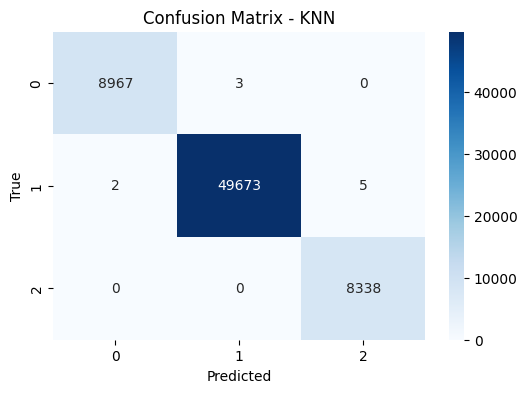

 MODEL: RANDOM_FOREST
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8970
           1       1.00      1.00      1.00     49680
           2       1.00      1.00      1.00      8338

    accuracy                           1.00     66988
   macro avg       1.00      1.00      1.00     66988
weighted avg       1.00      1.00      1.00     66988


Confusion Matrix:
[[ 8970     0     0]
 [    0 49680     0]
 [    0     0  8338]]


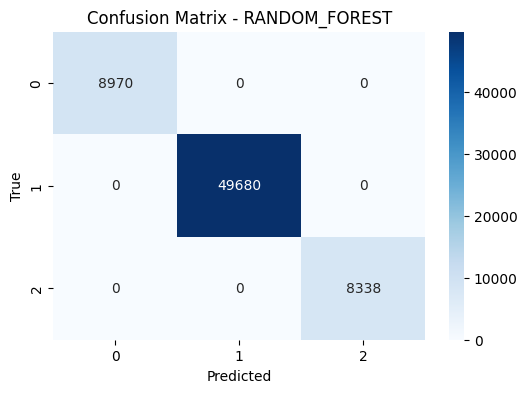

 MODEL: SVM
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8970
           1       1.00      1.00      1.00     49680
           2       1.00      1.00      1.00      8338

    accuracy                           1.00     66988
   macro avg       1.00      1.00      1.00     66988
weighted avg       1.00      1.00      1.00     66988


Confusion Matrix:
[[ 8970     0     0]
 [    2 49678     0]
 [    0     0  8338]]


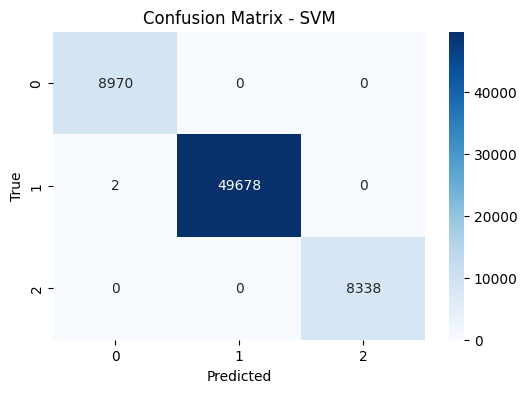

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

X_test_scaled = scaler.transform(X_test)

scaled_models = ["svm", "knn"]

for name, model in models.items():
    print(f" MODEL: {name.upper()}")

    try:

        if name in scaled_models:
            X_eval = X_test_scaled
        else:
            X_eval = X_test

        y_pred = model.predict(X_eval)


        acc = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1  = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {pre:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1-score : {f1:.4f}\n")

        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))


        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)

        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {name.upper()}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    except Exception as e:
        print(f"ERROR in model {name}: {e}")


In [19]:
def extract_features(password: str):
    digits = count_digits(password)
    upper = count_uppercase(password)
    lower = count_lowercase(password)
    len_pass = len_password(password)
    count_special = count_special_chars(password)
    entropy_theore = entropy_theoretical(password)
    entropy_shan = entropy_shannon(password)
    
    data = {
        "len_password": len_pass,
        "count_uppercase": upper,
        "count_lowercase": lower,
        "count_digits": digits,
        "count_special_chars":count_special,
        "entropy_theoretical":entropy_theore,
        "entropy_shannon":entropy_shan

    }

    return pd.DataFrame([data])


In [20]:
def predict_password_strength(password, models, scaler):

    df = extract_features(password)

    results = {}

    for name, model in models.items():
        
        try:
            if name in ["svm", "knn"]:
                X_eval = scaler.transform(df)
            else:
                X_eval = df

            pred = model.predict(X_eval)[0]


            if pred == 0:
                label = "YEU"
            elif pred == 1:
                label = "trung binh"
            else:
                label = "MANH"

            results[name] = label

        except Exception as e:
            results[name] = f"ERROR: {e}"

    return results


In [21]:
predict_password_strength("@123",models,scaler )

{'knn': 'YEU', 'random_forest': 'YEU', 'svm': 'YEU'}